In [17]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Time-series analysis (if applicable)
import statsmodels.api as sm

# Handling date and time
import datetime as dt

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
%matplotlib inline
sns.set(style="whitegrid")


In [18]:
# Load the dataset
file_path = r"C:\Users\Alexis\Individual-Household-Electric-Power-Consumption\Data\household_power_consumption.txt"

# Load with specified delimiter
df = pd.read_csv(file_path, sep=';', low_memory=False, na_values='?', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True)

# Preview the dataset
df.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
# Check for missing data in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [11]:
# Calculate percentage of missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])  # Display columns with missing values and their percentages


Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


In [12]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Verify there are no missing values
print(df.isnull().sum())  # Should show 0 for all columns


datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [14]:
# Extract new features from 'datetime' column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

# Display the first few rows to verify the new columns
df.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,minute
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,24
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,25
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,26
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,27
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,28


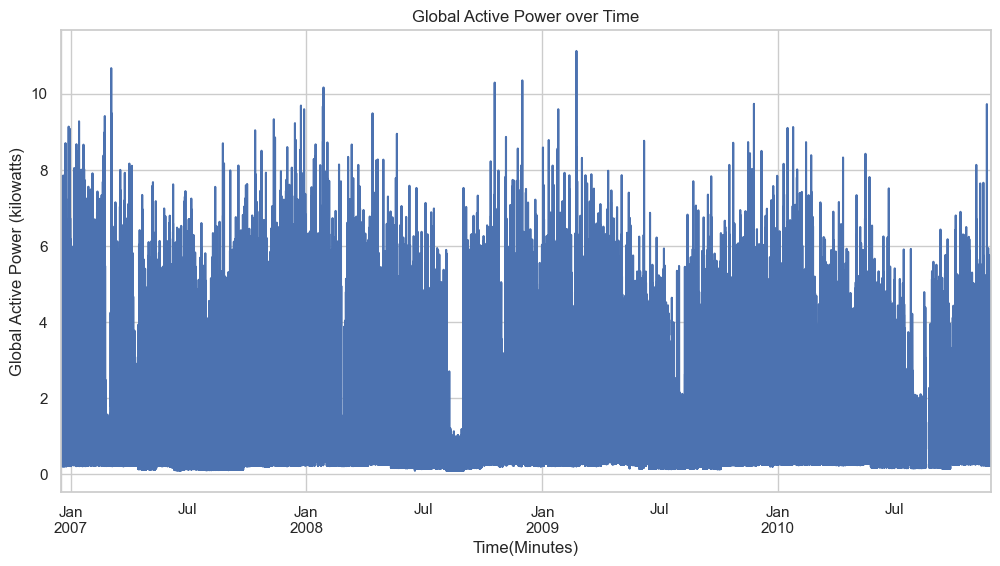

In [20]:
# Set datetime as the index for accurate time plotting
df.set_index('datetime', inplace=True)

# Plot Global Active Power over time
plt.figure(figsize=(12,6))
df['Global_active_power'].plot()
plt.title('Global Active Power over Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.xlabel('Time(Minutes)')
plt.show()


In [ ]:
# Analysis:
# The line plot above displays the "Global Active Power" consumption over time 
# from December 2006 to November 2010. The data reveals clear daily fluctuations 
# in power usage, with some significant peaks in consumption during certain periods.
# Notably, there is a slight seasonal trend, with lower consumption around mid-2007 
# and mid-2009, potentially reflecting less energy use during warmer seasons.
# Additionally, there are some dips in power usage, which may indicate periods 
# of reduced activity or appliance usage in the household. The overall consumption 
# pattern shows variability over time but remains consistent around a baseline of 
# 3-4 kilowatts, with occasional peaks reaching up to 10 kilowatts.


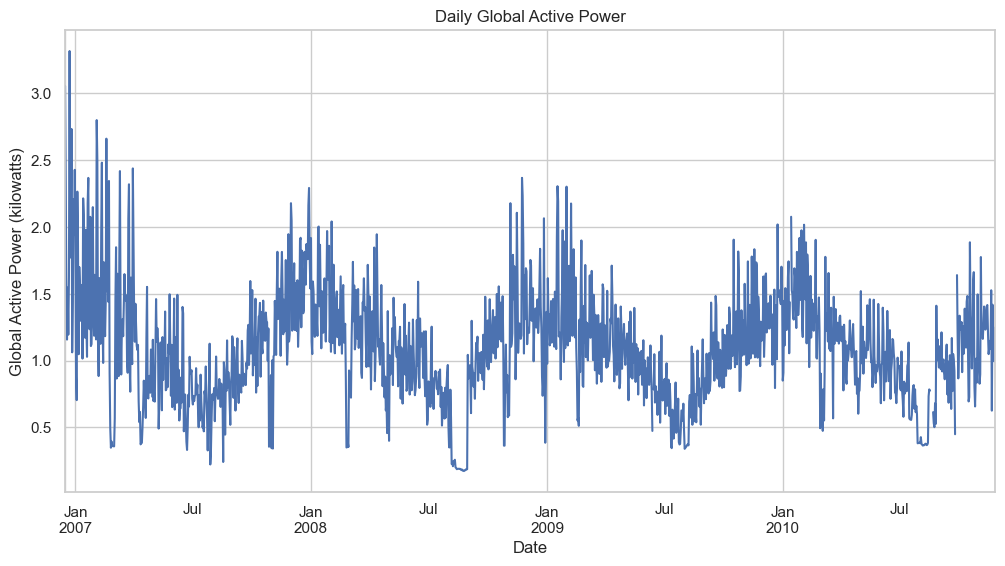

In [19]:
# Resample data to daily average
daily_data = df.resample('D', on='datetime').mean()

# Plot Global Active Power resampled to daily
plt.figure(figsize=(12,6))
daily_data['Global_active_power'].plot()
plt.title('Daily Global Active Power')
plt.ylabel('Global Active Power (kilowatts)')
plt.xlabel('Date')
plt.show()


In [21]:
# Analysis of Daily Global Active Power
# 
# This chart shows the daily average global active power usage over time. 
# A clear seasonal trend is visible, with power consumption peaking during certain months and dropping during others.
# The cyclical pattern suggests that the household uses more power during colder months, likely for heating purposes, 
# and less during warmer months, possibly due to reduced energy needs or less heating usage.
# Starting from mid-2009, there appears to be an increase in power consumption, which could indicate lifestyle changes 
# or increased demand for energy due to external factors.
# The data reflects that energy usage fluctuates throughout the years, aligning with what might be annual weather cycles.


None


In [23]:
# Export the resampled dataset to CSV
daily_data.to_csv(r'C:\Users\Alexis\Individual-Household-Electric-Power-Consumption\Data\resampled_daily_power_data.csv', index=True)

In [25]:
import numpy as np

# Calculate the Z-score for each value in the 'Global_active_power' column
# Z-score indicates how many standard deviations a data point is from the mean
df['z_score'] = (df['Global_active_power'] - df['Global_active_power'].mean()) / df['Global_active_power'].std()

# Set a threshold for identifying outliers (e.g., any Z-score greater than 3 or less than -3 is considered an outlier)
threshold = 3

# Filter the dataframe to identify outliers
outliers = df[np.abs(df['z_score']) > threshold]

# Display the identified outliers
print(outliers)


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:34:00                4.448                  0.498   232.86   
2006-12-16 17:35:00                5.412                  0.470   232.78   
...                                  ...                    ...      ...   
2010-11-25 07:45:00                4.340                  0.284   236.40   
2010-11-25 07:46:00                4.318                  0.280   236.17   
2010-11-25 07:50:00                4.284                  0.204   237.28   
2010-11-25 07:51:00                4.440                  0.214   236.81   
2010-11-25 07:52:00                4.302                  0.194   236.84   

           

In [27]:
# Export the identified outliers to a CSV file for visualization
outliers.to_csv('power_consumption_outliers.csv', index=False)
